In [49]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Loading tha data
dataset = pd.read_csv('fraudTrain.csv')

In [51]:
print(dataset)

        Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2019-01-01 00:00:18     2703186189652095   
1                1   2019-01-01 00:00:44         630423337322   
2                2   2019-01-01 00:00:51       38859492057661   
3                3   2019-01-01 00:01:16     3534093764340240   
4                4   2019-01-01 00:03:06      375534208663984   
...            ...                   ...                  ...   
674290      674290   2019-10-14 09:11:40      213193596103206   
674291      674291   2019-10-14 09:11:42      213193596103206   
674292      674292   2019-10-14 09:12:09  4792627764422477317   
674293      674293   2019-10-14 09:15:24       30407675418785   
674294      674294   2019-10-14 09:15:32       30235438713303   

                                  merchant       category     amt      first  \
0               fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme    grocery_pos  

In [52]:
# Data Analysis
dataset.info() # this will be useful when there is null in some datasets to fill those null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674295 entries, 0 to 674294
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             674295 non-null  int64  
 1   trans_date_trans_time  674295 non-null  object 
 2   cc_num                 674295 non-null  int64  
 3   merchant               674295 non-null  object 
 4   category               674295 non-null  object 
 5   amt                    674295 non-null  float64
 6   first                  674295 non-null  object 
 7   last                   674295 non-null  object 
 8   gender                 674295 non-null  object 
 9   street                 674295 non-null  object 
 10  city                   674294 non-null  object 
 11  state                  674294 non-null  object 
 12  zip                    674294 non-null  float64
 13  lat                    674294 non-null  float64
 14  long                   674294 non-nu

In [53]:
# This is useful to check the value is null or not if nulll then 1, else 0
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [54]:
# as you can see that last entry has some empty cells for some attributes so let's delete that from our datset
# this drops the rows from the datset where some rows have NaN in the columns
dataset = dataset.dropna()

In [55]:
dataset.isnull().sum() # now data doesn't have any missing value or NaN

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [56]:
dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,674294.000000,6.742940e+05,674294.000000,674294.000000,674294.000000,674294.000000,6.742940e+05,6.742940e+05,674294.000000,674294.000000,674294.000000
mean,337146.500000,4.167751e+17,70.245965,48779.950099,38.536600,-90.217772,8.904094e+04,1.338664e+09,38.536403,-90.218235,0.005938
std,194652.055544,1.308372e+18,159.159001,26907.223883,5.073756,13.765522,3.027065e+05,6.802747e+06,5.107958,13.777371,0.076830
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,168573.250000,1.800365e+14,9.640000,26041.000000,34.668900,-96.798000,7.430000e+02,1.333110e+09,34.741722,-96.886006,0.000000
50%,337146.500000,3.520550e+15,47.400000,48174.000000,39.354300,-87.461600,2.456000e+03,1.339204e+09,39.367217,-87.426757,0.000000
75%,505719.750000,4.642255e+15,83.030000,72011.000000,41.894800,-80.138100,2.047800e+04,1.344357e+09,41.954072,-80.216909,0.000000
max,674293.000000,4.992346e+18,26544.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.350206e+09,67.510267,-66.956540,1.000000


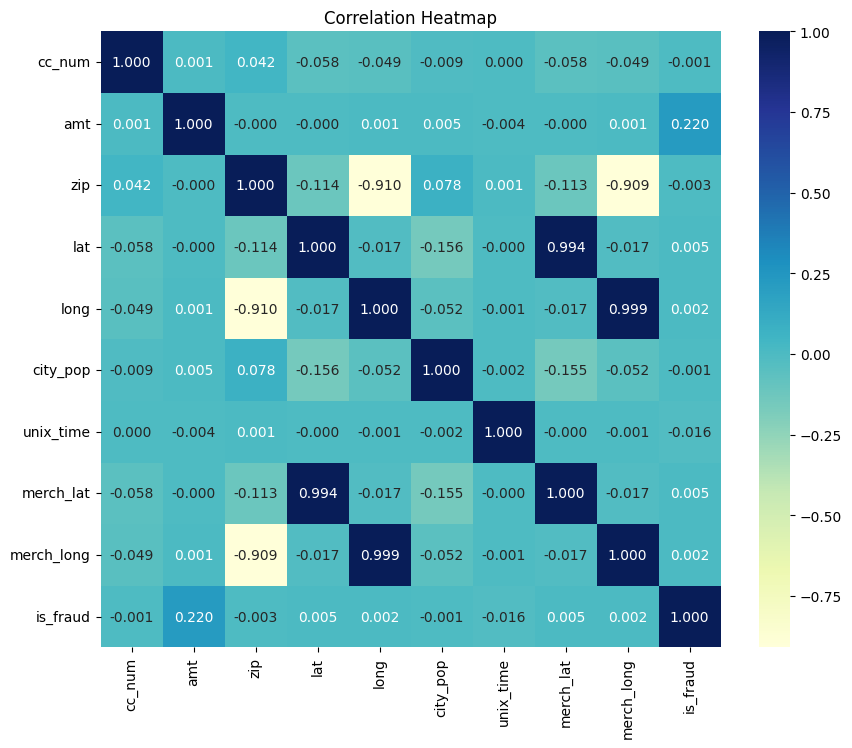

In [57]:
# heatmap only for those attributes whose values are numerical
corr_matrix=dataset[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt='.3f',cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-58-76d329042a27>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['city_pop'][dataset['is_fraud']==1],shade=True,color='r')
<ipython-input-58-76d329042a27>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset['city_pop'][dataset['is_fraud']==0],shade=True,color='b')


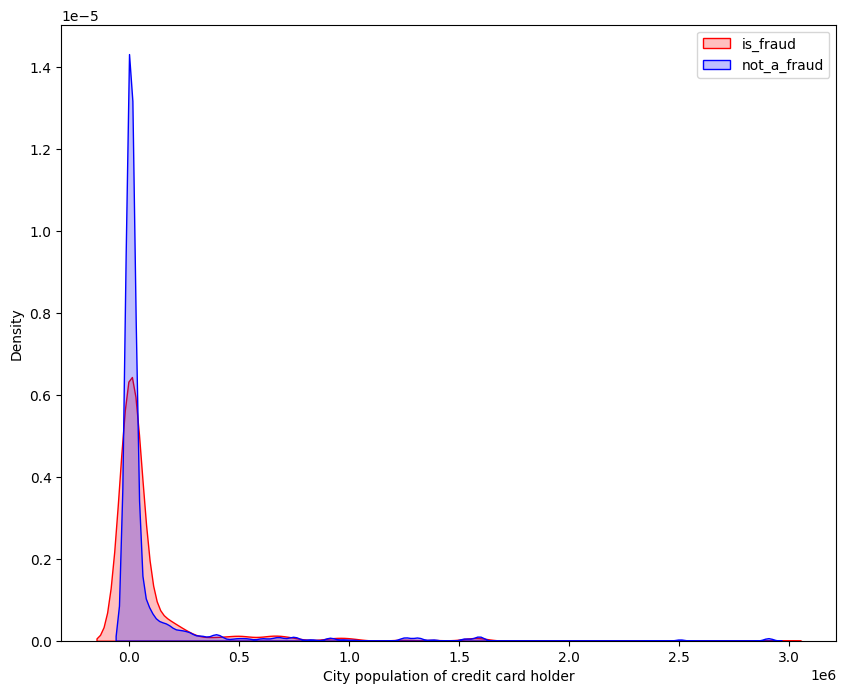

In [58]:
# category of merchant and is_fraud(target variable)
plt.figure(figsize=(10,8))
# Plotting Density function graph of the merchant and is_fraud(target variable)
kde = sns.kdeplot(dataset['city_pop'][dataset['is_fraud']==1],shade=True,color='r')
kde = sns.kdeplot(dataset['city_pop'][dataset['is_fraud']==0],shade=True,color='b')
kde.set_xlabel('City population of credit card holder')
kde.set_ylabel('Density')
kde.legend(['is_fraud','not_a_fraud'])

In [59]:
# from the above graph we may say that as the density of fraud transactions is less where the city population is less and as the city population increases fraud transactions are slightly increasing

In [60]:
# Transforming the data
from sklearn.preprocessing import LabelEncoder
X = dataset.drop('is_fraud',axis=1).values
y = dataset['is_fraud']
Le = LabelEncoder()
for i in range(len(X[0])):
  X[:,i] = Le.fit_transform(X[:,i])
print(X)
print(y)

[[0 0 430 ... 0 205030 450669]
 [1 1 40 ... 1 657648 40788]
 [2 2 229 ... 2 548360 62114]
 ...
 [674291 663666 291 ... 663698 602251 387250]
 [674292 663667 928 ... 663699 348258 214723]
 [674293 663668 187 ... 663700 455697 570383]]
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
674289    0.0
674290    0.0
674291    0.0
674292    0.0
674293    0.0
Name: is_fraud, Length: 674294, dtype: float64


In [61]:
# Using Logistic Regression

In [62]:
# Importing the necessary libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [63]:
# Fitting the model
clf = LogisticRegression(random_state=42)
# train_test_split is not required as train and test data are given in two different .csv files
clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [64]:
# Now Finding the accuracy for that let's load the test data
test_dataset = pd.read_csv('fraudTest.csv')
test_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [65]:
# as you can see some columns have missing data so dropping those rows whose values are missing
test_dataset = test_dataset.dropna()

In [66]:
X_test = test_dataset.drop('is_fraud',axis=1).values
y_test = test_dataset['is_fraud']

In [67]:
Le = LabelEncoder()
for i in range(len(X[0])):
  X_test[:,i] = Le.fit_transform(X_test[:,i])

In [68]:
print(X_test)
print(y_test)

[[0 0 401 ... 0 39570 134766]
 [1 1 543 ... 1 95910 20225]
 [2 2 586 ... 2 115062 175573]
 ...
 [190167 186734 206 ... 186734 140937 171201]
 [190168 186735 109 ... 186735 121955 53720]
 [190169 186736 765 ... 186736 99216 159233]]
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
190165    0.0
190166    0.0
190167    0.0
190168    0.0
190169    0.0
Name: is_fraud, Length: 190170, dtype: float64


In [69]:
# finding the predictions and acuracy
# here accuracy is the test accracy
predictions = clf.predict(X_test)
print(predictions)
print(accuracy_score(y_test,predictions))

[0. 0. 0. ... 0. 0. 0.]
0.9857127832991534


In [70]:
# let's find the train and test score or accuracy
train_clf= clf.score(X,y)
test_clf= clf.score(X_test,y_test)
print(train_clf)
print(test_clf)

0.9939907518085583
0.9857127832991534


In [71]:
# confusion matrix
print(confusion_matrix(y_test,predictions))

[[187233   2114]
 [   603    220]]


In [72]:
# let's see the actual and predicted value
print("actual value: ", y_test[10])
print("predicted value: ",clf.predict(X_test)[10])

actual value:  0.0
predicted value:  0.0


In [73]:
# It predicted correctly

In [74]:
# That's the Credit Card fraud detection using Logistic regression

In [75]:
# Using Decision Trees

In [76]:
# Importing the necessary libraries for model fitting
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [77]:
# finding the predictions and acuracy
# here accuracy is the test accracy
predictions = dt.predict(X_test)
print(predictions)
print(accuracy_score(y_test,predictions))

[0. 0. 0. ... 0. 0. 0.]
0.9926486827575327


In [78]:
print("Training Accuracy:",dt.score(X,y))
print("Test Accuracy:",dt.score(X_test,y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9926486827575327


In [79]:
# let's see the actual and predicted value
print("actual value: ", y_test[10])
print("predicted value: ",clf.predict(X_test)[10])

actual value:  0.0
predicted value:  0.0


In [80]:
#####################

In [81]:
# now we change the depth of decision tree to see what are the changes
dt = DecisionTreeClassifier(random_state=42,max_depth=5)
dt.fit(X,y)
print("Training Accuracy:",dt.score(X,y))
print("Test Accuracy:",dt.score(X_test,y_test))

Training Accuracy: 0.9965504661171537
Test Accuracy: 0.9956722932113372


In [82]:
# If we didn't set any depth then it takes every attribute and split into branches which is kind of overfit to the train data
# as you can see by fixing the depth training accuracy is reduced where as test accuracy is increased

In [83]:
# That's the Credit Card fraud detection using Decision Trees